In [11]:
import numpy as np
import os
import pandas as pd
import json
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# our utils functions
from utils import *

# our classes
from PreprocessData import *
from EvaluateModel import *

In [98]:
# read test data
test_df = pd.read_csv('data/mix/data41mix_test.csv')

In [97]:
# initialize preprocess class
preprocess = PreprocessData()

In [7]:
# normalize, shuffle
X_test, y_test = preprocess.preprocess_data(test_df)

In [8]:
print('Size of testing matrix:', X_test.shape)

Size of testing matrix: (4593, 2808)


In [9]:
unique_words = set(y_test)

# class size
class_size=len(unique_words)
print(unique_words)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0}


In [8]:
model_grid = [
    {      
            'model_name': "NNs",
            'model_type': "normal",
            'model_dir': "models/NNs/mix"
    },
    
    {      
            'model_name': "1_all_NNs",
            'model_type': "onevsall",
            'model_dir': "models/1_all_NNs/mix"
    }

]

In [108]:
eval_model_dir = dict()

for model in model_grid:
    print(model['model_name'])
    
    # initialize evaluate model
    evaluate = EvaluateModel(model['model_name'], model['model_type'], model['model_dir'], class_size=class_size)
    # get model
    evaluate.models = evaluate.get_models()
    # append model to dict
    eval_model_dir[model['model_name']] = evaluate
    
    del evaluate

In [29]:
import json

class_size=41

# get label dict
with open('dict41.txt', encoding='utf-8') as data_file:
    data = json.loads(data_file.read())
    
# get labels by order
label = [data[str(i)] for i in range(class_size)]

NNs


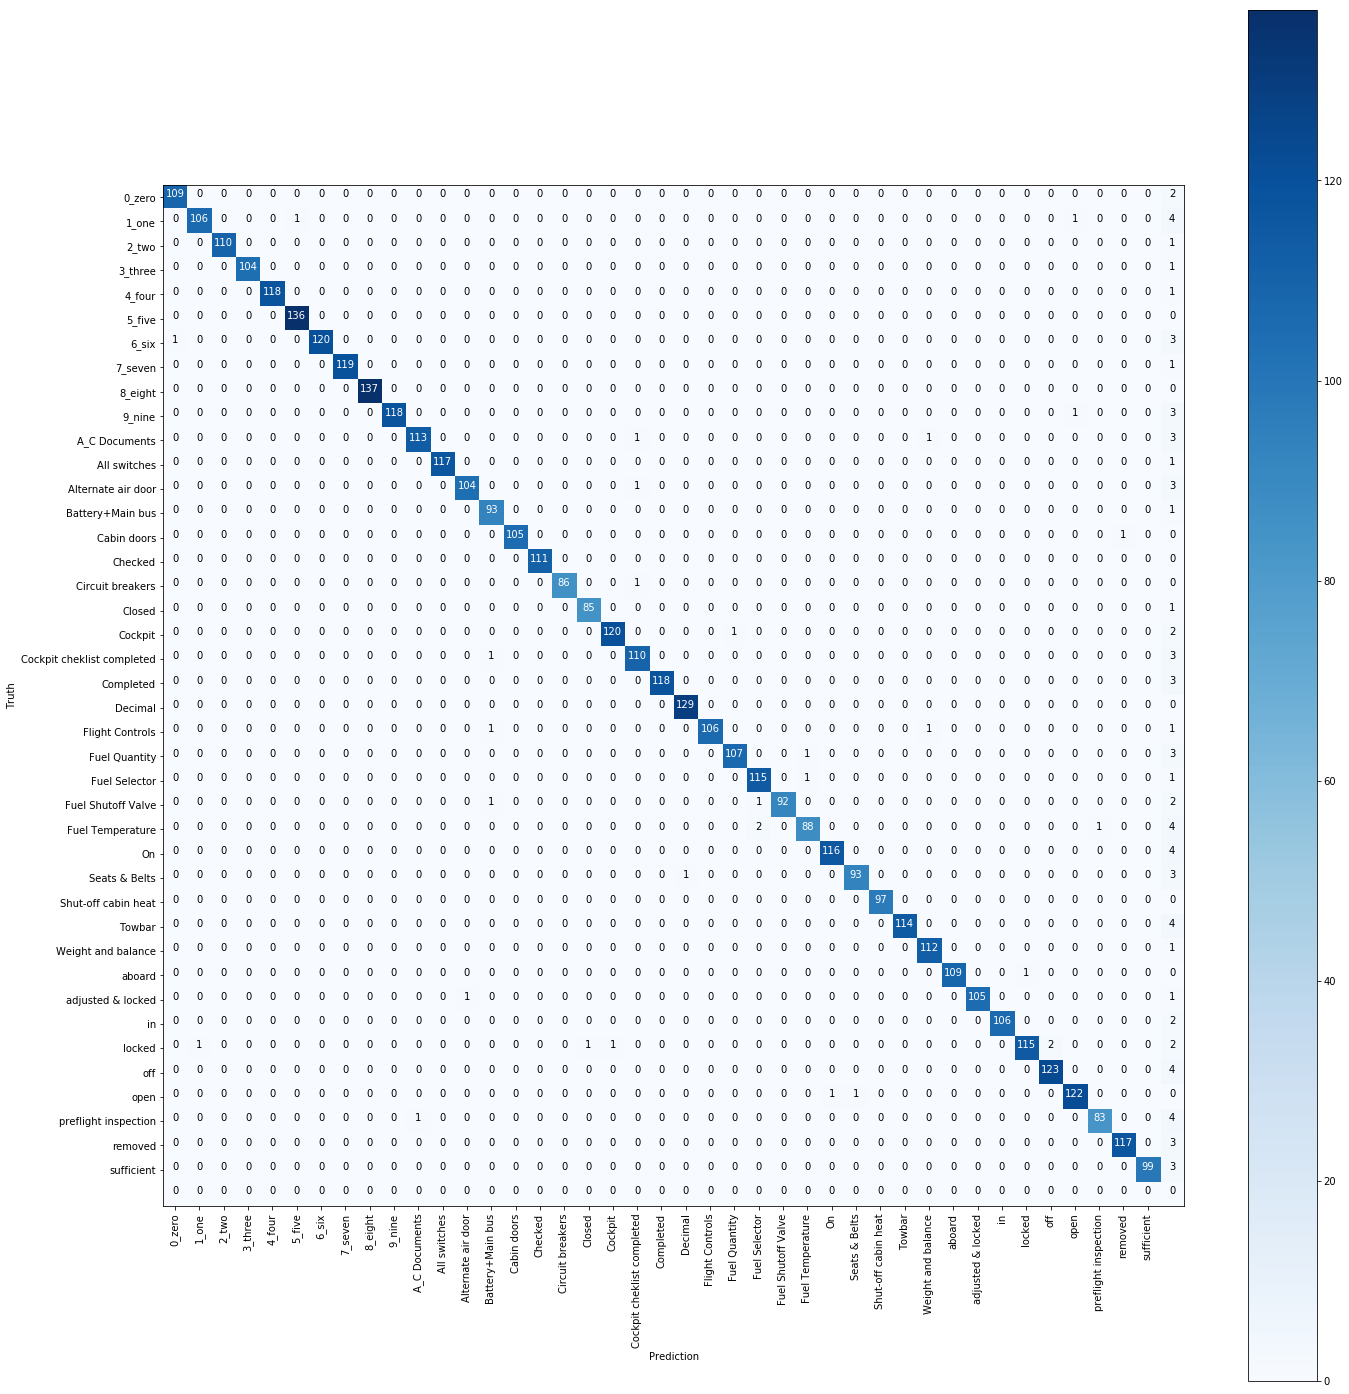

1_all_NNs


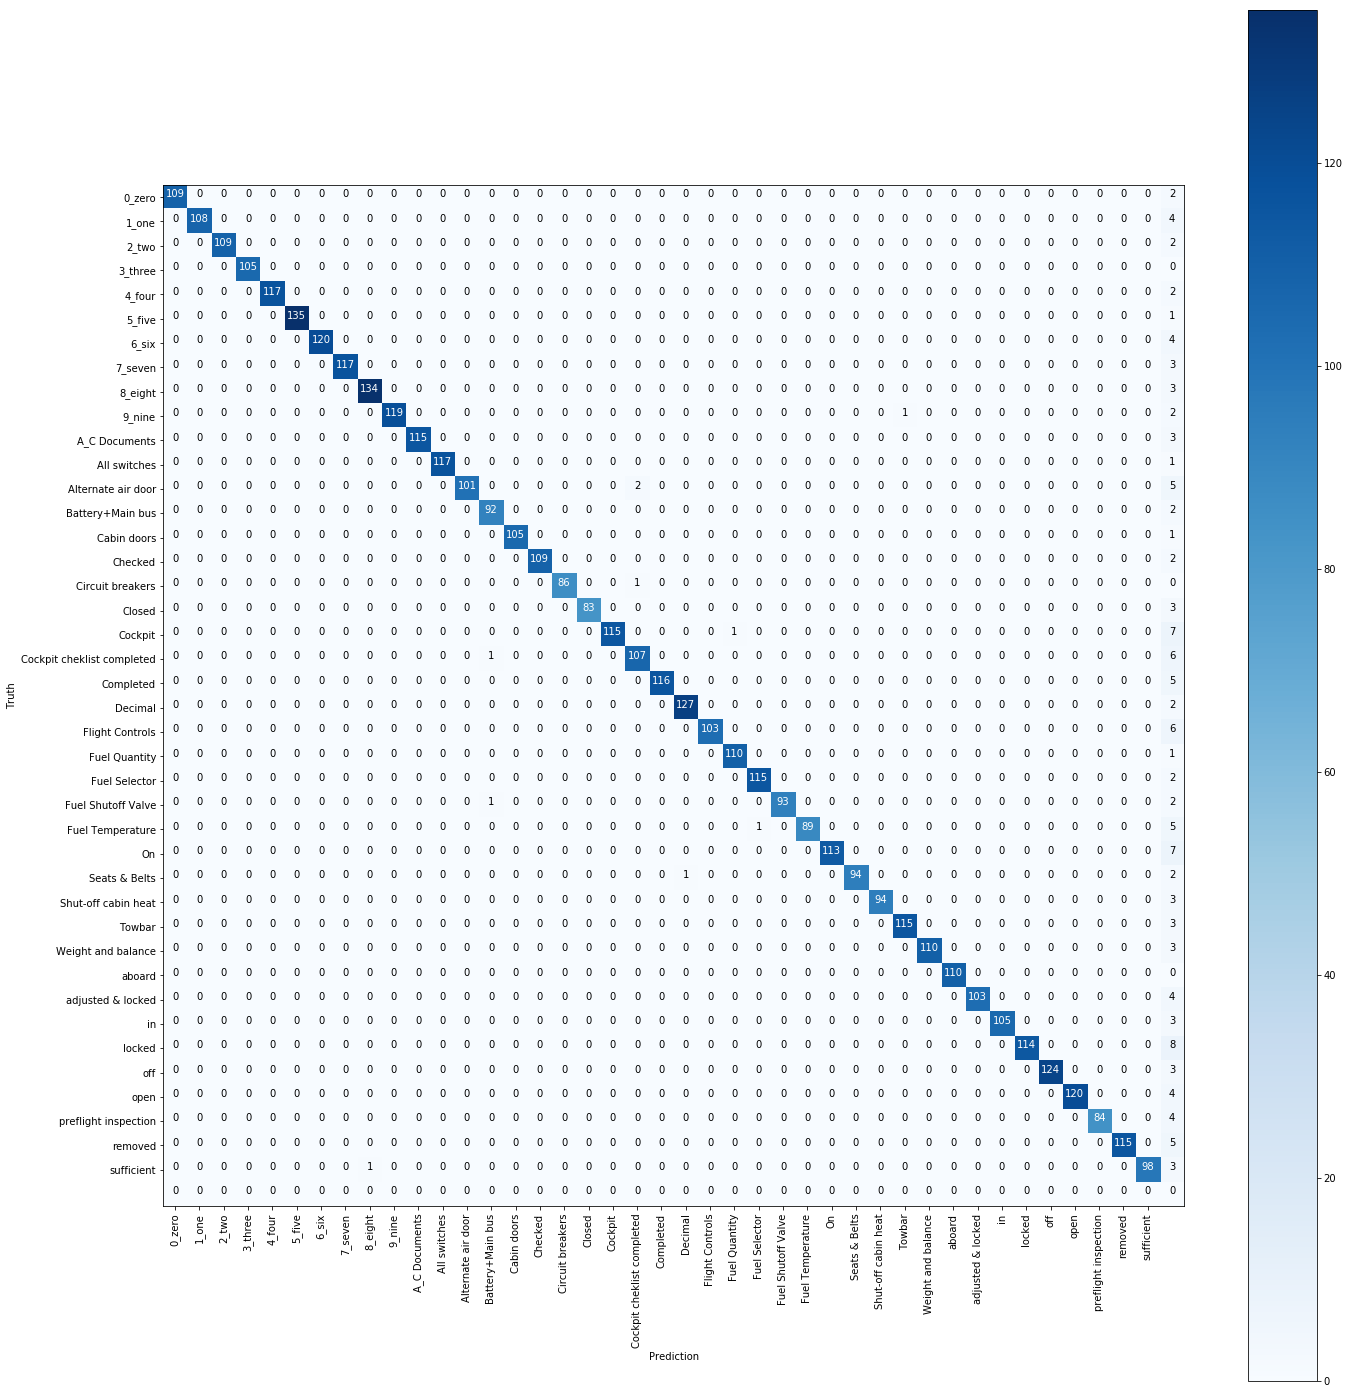

In [166]:
result_l = []
rejection_l =[]
total_rejection_l =[]

for i, model_g in enumerate(model_grid):
    
    # get model
    model = eval_model_dir[model_g['model_name']]
    # get prediction results
    result, predicted_labels = model.calculate_res(model.models, h1=0.9, h2=0.5, X_test=X_test, target=y_test)
    # calculate confussion matrics
    conf_matric = model.calculate_conf_mat(target=y_test, predicted_labels=predicted_labels)
    # get rejection values
    rejection, total_rejection = model.get_rejection_ratio(conf_matric)
    
    result_l.append(result)
    rejection_l.append(rejection)
    total_rejection_l.append(total_rejection)
    
    print(model_g['model_name'])
    # plot conffusion matrics
    plot_confusion_matrix(conf_matric, label, 'Prediction', 'Truth', normalize=False)

In [203]:
header = '{:<{key_width}}{:<{key_width2}}{:<{key_width3}}'.format(
    "Target Labels",
    model_grid[0]['model_name'],
    model_grid[1]['model_name'],
    key_width=27,
    key_width2=11,
    key_width3=0
)

In [205]:
for i in range(len(result_l)):
    print("Model: " + model_grid[i]['model_name'])
    print("Accuracy: %.4f" % (np.mean(result_l[i])))
    print("Total rejection: %.4f\n" %(total_rejection_l[i]*100))


print(header)
print('-'*len(header))
for i in range(class_size):
    print('{label1:<{width}} : {ratio1:<{width2}}   {ratio2}'.format(label1=str(data[str(i)]), ratio1=("%.4f" %(rejection_l[0][i]*100)), width=26,  width2=5, ratio2=("%.4f" %(rejection_l[1][i]*100))))

Model: NNs
Accuracy: 0.9769
Total rejection: 1.6600

Model: 1_all_NNs
Accuracy: 0.9700
Total rejection: 2.8667

Target Labels              NNs        1_all_NNs
-----------------------------------------------
0_zero                     : 1.8018   1.8018
1_one                      : 3.5714   3.5714
2_two                      : 0.9009   1.8018
3_three                    : 0.9524   0.0000
4_four                     : 0.8403   1.6807
5_five                     : 0.0000   0.7353
6_six                      : 2.4194   3.2258
7_seven                    : 0.8333   2.5000
8_eight                    : 0.0000   2.1898
9_nine                     : 2.4590   1.6393
A_C Documents              : 2.5424   2.5424
All switches               : 0.8475   0.8475
Alternate air door         : 2.7778   4.6296
Battery+Main bus           : 1.0638   2.1277
Cabin doors                : 0.0000   0.9434
Checked                    : 0.0000   1.8018
Circuit breakers           : 0.0000   0.0000
Closed                     